# Data Analysis on Heart Disease
**DSCI 100 009 Group 43 Group Project**

Yuki Matsushima, Vitor Wakamatsu, Pei Yi Chew, Henry Yang

## Introduction
Heart diseases are one of the leading causes of death in the world for many years. With the increasing rate of cases for heart diseases, it is important to focus at the leading causes of this disease and establish a relationship between these vicious disease. As a base for our analysis we are going to use the heart disease dataset available at Kaggle. 
(https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data)

This is the cleaned version of the data set given in Canvas -> group_project_proposal


The dataset originates from 1988 and evaluates data from four different databases: Cleveland, Hungary, Switzerland and Long Beach V. While the dataset does have 76 distinct attributes, it only utilizes 14 of them. In our group project, we chose to focus on the variables age, resting blood pressure, cholesterol, and  maximum heart rate and compere it to the diagnosis of heart disease. We chose this variables since according to National Center for Chronic Disease Prevention and Health Promotion (NCCDPHP) it is considered one of the leading reason of causing the heart disease. 

From these following information, we will be attempting to answer the following predictive question:

**Predictive question:**
How does the amount of cholesterol, type of heart defect, age, and sex help us predict the diagnosis of heart disease?

We will be conducting a KNN classification in order to answer the predictive question.

In [1]:
### Run this cell before continuing.
install.packages("kknn")
library(kknn)
library(repr)
library(tidyverse)
library(tidymodels)
library(dplyr)
library(ggplot2)
options(repr.matrix.max.rows = 10)
install.packages("gridExtra")
library(gridExtra)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks strin

## Reading the Data

First read the raw data from GitHub that we uploaded using the `read` function.


**Variables**

age: Age

sex: Sex

cp: Chest pain type (4 values)

trestbps: Resting blood pressure

chol: Serum cholesterol in mg/dl

fbs: Fasting blood sugar > 120 mg/dl

restecg: Resting electrocardiographic results (values 0,1,2)

thalacg: Maximum heart rate achieved

exang: Exercise induced angina

oldpeak: ST Depression induced by exercise relative to rest

slope: Slope of the peak exercise ST segment

ca: Number of major vessels (0-3) colored by fluoroscopy

thal: Type of hear disease; 0 = normal; 1 = fixed defect; 2 = reversable defect

target: Diagnosis of heart disease

In [2]:
heart_disease_data <- read_csv("https://raw.githubusercontent.com/yma24ma/dsci_009_43_gp/main/heart.csv")
heart_disease_data

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
47,1,0,110,275,0,0,118,1,1.0,1,1,2,0


**Select Data**

We will now be using the `select()` function to select the row that we will be using in this analysis and make it into one table. Then we will `mutate()` the variable `target` in to "yes" and "no".

In [3]:
heart_disease_selected <- select(heart_disease_data, age, chol, target, thalach, trestbps)|>
                          mutate(target=as_factor(target))|>
                          mutate(heart_disease=fct_recode(target, "Yes" = "1", "No " = "0"))
heart_disease_selected

age,chol,target,thalach,trestbps,heart_disease
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>
52,212,0,168,125,No
53,203,0,155,140,No
70,174,0,125,145,No
61,203,0,161,148,No
62,294,0,106,138,No
⋮,⋮,⋮,⋮,⋮,⋮
59,221,1,164,140,Yes
60,258,0,141,125,No
47,275,0,118,110,No


## Analyzing Data

**NA Values**

We use the `is.na()` function to check if there are any NA values in our data tables, and use `sum()` function to sum up the whole NA values that was counted. We are doing this since there may be a chance that there are too many NA values in order to conduct an analysis on these variables.

In [4]:
sum(is.na(heart_disease_selected))

[1] 0

Since there are no NA values, it is suitable to use these variables for our project.

**Summary Table**

For our summary table, we will summarize the minimum value, median, median, maximum value, and the standard deviation for each values.

In [5]:
summary_table <- data.frame(Variable = c("Age", "trestbps", "thalach", "chol"),
Mean = c(mean(heart_disease_selected$age),
        mean(heart_disease_selected$trestbps),
        mean(heart_disease_selected$thalach),
        mean(heart_disease_selected$chol)),
Median = c(median(heart_disease_selected$age),
         median(heart_disease_selected$trestbps),
         median(heart_disease_selected$thalach),
         median(heart_disease_selected$chol)),
SD = c(sd(heart_disease_selected$age),
     sd(heart_disease_selected$trestbps),
     sd(heart_disease_selected$thalach),
     sd(heart_disease_selected$chol)),
Min = c(min(heart_disease_selected$age),
      min(heart_disease_selected$trestbps),
      min(heart_disease_selected$thalach),
      min(heart_disease_selected$chol)),
Max = c(max(heart_disease_selected$age),
      max(heart_disease_selected$trestbps),
      max(heart_disease_selected$thalach),
      max(heart_disease_selected$chol)))

print(summary_table)

  Variable      Mean Median       SD Min Max
1      Age  54.43415     56  9.07229  29  77
2 trestbps 131.61171    130 17.51672  94 200
3  thalach 149.11415    152 23.00572  71 202
4     chol 246.00000    240 51.59251 126 564


# Need an Analysis on this↑

**Box Plots**

Now, we will be visually representing those values found above using a box and whisker diagram.

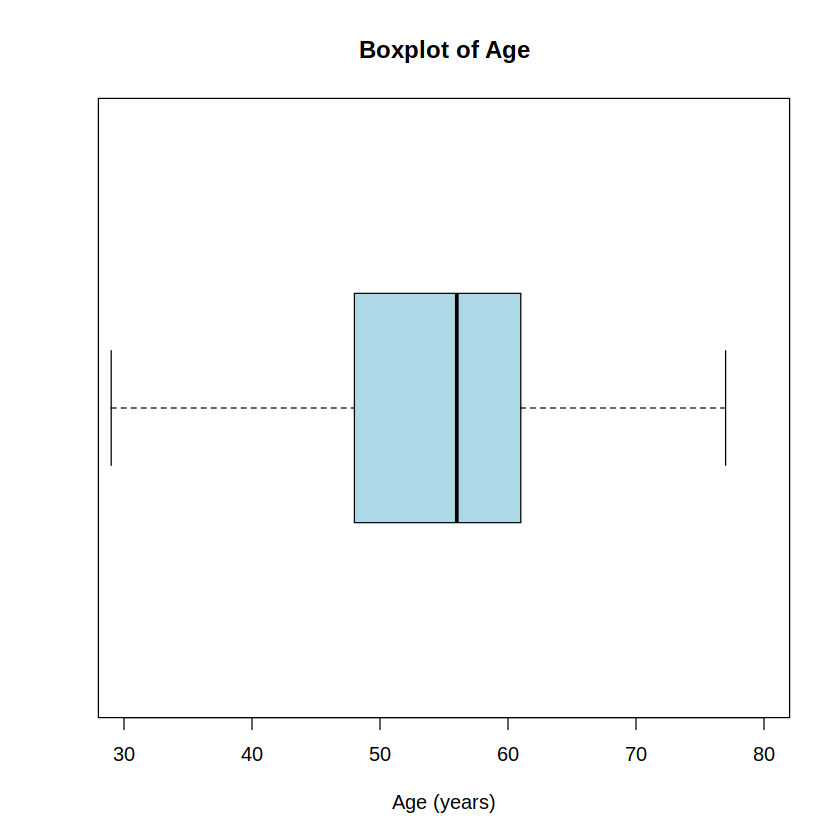

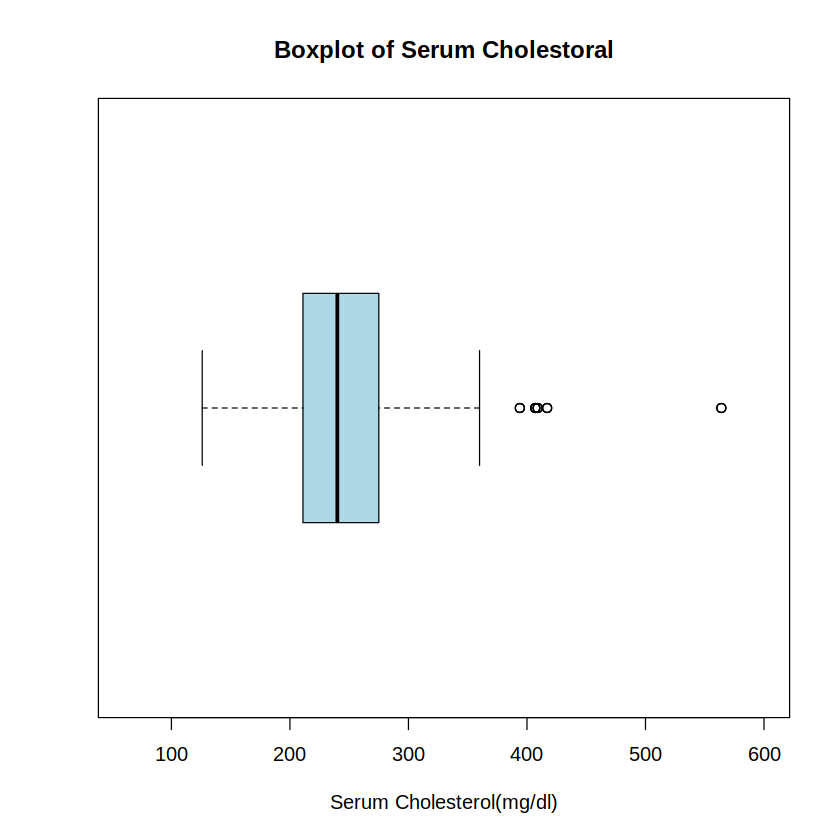

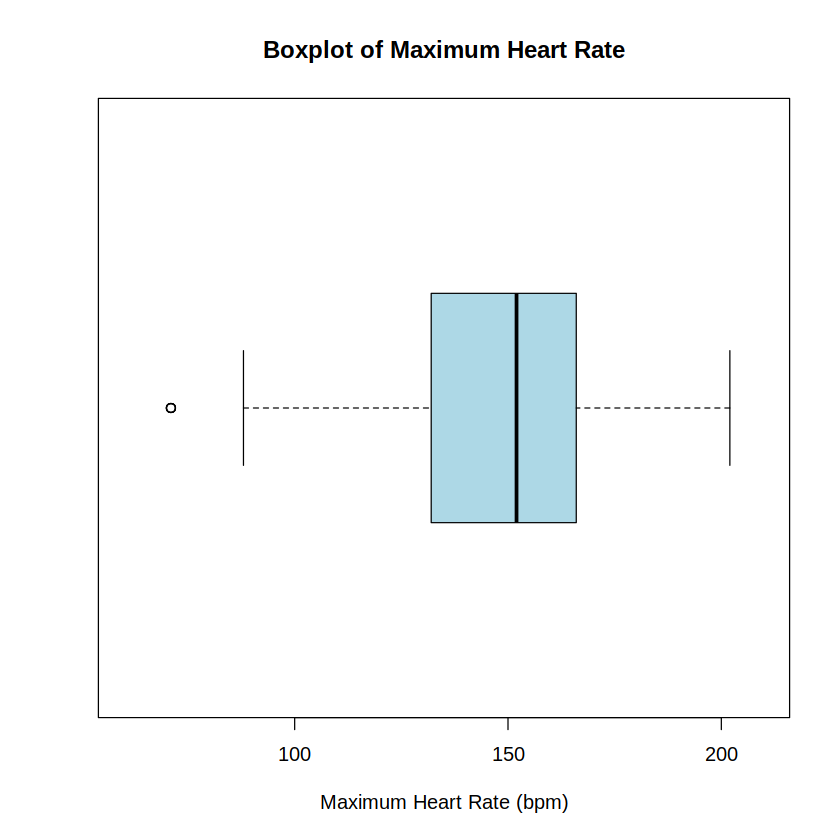

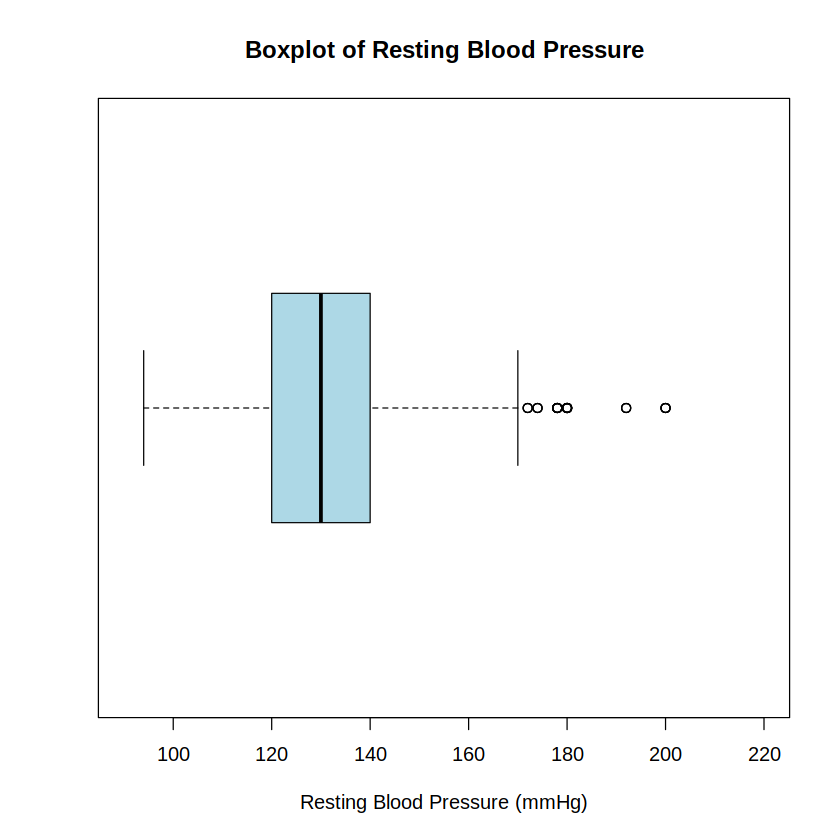

In [6]:
boxplot_age <- boxplot(heart_disease_selected$age, 
                       horizontal = TRUE,
                       ylim=c(30,80),
                       xlab="Age (years)",
                       col="lightblue",
                       main="Boxplot of Age")

boxplot_chol <- boxplot(heart_disease_selected$chol, 
                        horizontal = TRUE,
                        ylim=c(60,600),
                        xlab="Serum Cholesterol(mg/dl)",
                        col="lightblue",
                        main="Boxplot of Serum Cholestoral")

boxplot_thalach <- boxplot(heart_disease_selected$thalach, 
                           horizontal = TRUE,
                           ylim=c(60,210),
                           xlab="Maximum Heart Rate (bpm)",
                           col="lightblue",
                           main="Boxplot of Maximum Heart Rate")

boxplot_trestbps <- boxplot(heart_disease_selected$trestbps, 
                            horizontal = TRUE,
                            ylim=c(90,220),
                            xlab="Resting Blood Pressure (mmHg)",
                            col="lightblue",
                            main="Boxplot of Resting Blood Pressure")

**Summary Table / Box Plots Analysis**

The spread for age is between 29 to 77 years old. The first quartile and third quartile is 48 and 61 respectively, this means that our model is basically focusing on the age gap between 48 and 61 years old, which makes the mean 54.43 years old and 56 years old is the age of the majority patients in our data set which is relatively a higher age. This tells us that our model is predicting patients closer to retirement age, which would probably increase the number of heart diseases. If we want to predict a group of teenagers in their 20s or older people in their 70s, this model will not be appropriate to make the prediction.This means that our interquartile range is 61 - 48 = 13

The Standard Deviation is 9.07 years; this is the typical difference between each patient’s age and the mean age of the 1025 patients.


The spread for the resting blood pressure is from 94 mmHg to 200 mmHg. The first quartile is 120 and the third quartile 140 respectively. This means that our interquartile range is 140 - 120 = 20. Based on the box and whisker plot, we got a mean (average) of 131.6 and a median of 130.0. Since the mean is greater than the median, our data is right-skewed.

The spread for the resting blood pressure is from 71.0 bpm to 202.0 bpm. The first quartile is 132 and the third quartile 166 respectively. This means that our interquartile range is 166 - 132 = 34. Based on the box and whisker plot, we got a mean (average) of 149.1 and a median of 152. Since the mean is less than the median, our data is left-skewed.


The spread for the cholesterol is between 126 mg/dl and 564 mg/dl. The first quartile is 211 and the third quartile 275 respectively. This means that our interquartile range is 275 - 211 = 64. Based on the box and whisker plot, we got a mean (average) of 246 and a median of 240. Since the mean is greater than the median, our data is right-skewed.

## Visualization
Now we will visualize the relationship between each numerical variable vs the heart disease using `ggplot`.

### Age vs Cholesterol

Now, we will visualize the relationship between the age and the cholesterol. First, we will be using `select` function to create a table.

In [ ]:
hd_select_chol <- select(heart_disease_selected,age,chol,heart_disease)|>
               mutate(heart_disease)
hd_select_chol

Now, we will visualize the correlation between `age` and `chol` (the number of cholesterol) and whether there is any relationship with the diagnosis of heart disease. We will create a scatter plot using `geom_point` in order to visualize the relationship between those two variables. We will be using the `alpha` value of 0.3 in order to visualize any overlapping points and have a density visualization.
Hypothesis: We think that the patient with a higher age will have a higher cholesterol which will cause to have a higher rate of heart disease. 

In [ ]:
hd_chol_plot <- ggplot(hd_select_chol,aes(x = age, y = chol, colour = heart_disease)) +
                    geom_point(alpha = 0.3) +
                    labs(x = "Age", y = "Cholesterol (mg/dl)", colour = "Heart Disease", caption = "Figure 1") +       
                    ggtitle("Age vs Cholesterol Scatterplot")
hd_chol_plot

**Analysis**

By looking at the scatter plot above, it seems like there is a weak to no correlation between those two variables (age and the number of cholesterols) However, it has a slight tendency that the red dots which represent no heart disease are on the right side of the scatter plot, which means that the higher the age is, there are fewer people that are diagnosed with heart disease. This scatter plot has surprised us to some degree since we initially hypothesized that the higher the age is, the higher the cholesterol will be, and so as the number of patients diagnosed with heart disease. 

### Age vs Max Heart Rate

Now we will be using `age` and `thalach` to visualize the correlation between the Age and the Maximum Heart Rate achieved by the patient, and if they have any effect on the diagnosis of the heart disease. 

In [ ]:
hd_select_thalach <- select(heart_disease_selected,age,thalach,heart_disease)|>
                  mutate(heart_disease)
hd_select_thalach

In [ ]:
hd_thalach_plot <- ggplot(hd_select_thalach,aes(x = age, y = thalach, colour = heart_disease)) +
                       geom_point(alpha = 0.3)+
                       labs(x = "Age", y= "Maximum Heart Rate (bpm)", colour = "Heart Disease", caption = "Figure 2") +       
                       ggtitle("Age vs Maximum Heart Rate Scatterplot")
hd_thalach_plot   

**Analysis**

From the scatter plot above, it is clear that it has a weak negative correlation between the age and the maximum heart rate achieved. This was according to our hypothesis that the younger the age, the higher the maximum heart rate. This hypothesis was based on our research that it said to derive the maximum heart rate, minus the age from 220. (Centers for Disease Control and Prevention) 
Also, there is a tendency for patients with higher maximum heart rates tend to have a higher rate of heart disease. 

### Age vs Resting Blood Pressure

Now we will be using `age` and `trestbps` to visualize the correlation between the Age and the Resting Blood Pressure achieved by the patient, and if they have any effect on the diagnosis of the heart disease. 
Hypothesis: We think that elder patients will have a higher resting blood pressure which causes them to have a higher number of positive heart disease diagnoses. 

In [ ]:
hd_select_trestbps <- select(heart_disease_selected,age,trestbps,heart_disease)|>
                   mutate(heart_disease)
hd_select_trestbps

In [ ]:
hd_trestbps_plot <- ggplot(hd_select_trestbps,aes(x = age, y = trestbps, colour = heart_disease)) +
                        geom_point(alpha = 0.3) +
                        labs(x = "Age", y = "Resting Blood Pressure (mm/Hg)", colour = "Heart Disease", caption = "Figure 3") +       
                        ggtitle("Age vs Resting Blood Pressure Scatterplot")
hd_trestbps_plot   

**Analysis**

According to our scatter plot above, there is almost no correlation between the age and the resting blood pressure as well as the diagnosis of heart disease. This visualization allowed us to find that Resting Blood Pressure might not be a suitable variable to predict a diagnosis of heart disease.

## KNN Classification

**Methods**

In order to answer our predictive question, we are going to use the method of K-Nearest Neighbors classification. Essentially, we are going to use predictor variables amount of cholesterol, maximum heart rate, age and resting blood pressure to predict the diagnosis class of heart disease, which can be categorized into 0 (no heart disease) or 1 (heart disease). Therefore, the column names we will incorporate are `chol`, `thalach`, `age`, `trestbps` and `target`. We chose to only use four predictor variables because we think that there are more than two factors that contribute to the diagnosis of heart disease. Since there are multivariables, we can avoid a four dimensional graph by using the `facet_grid` function to create a plot that has multiple subplots arranged in a grid.

**Expected outcomes and significance**


What do you expect to find?

We expect to identify the most relevant features that contribute to the presence or absence of heart disease.We also look for patterns and correlations within the data.



What impact could such findings have?

Understanding the factors that contribute to heart disease can inform public health initiatives.Furthermore, discoveries from this dataset can enhance healthcare by improving diagnostic tools and predictive models for heart disease, potentially leading to early detection and treatment.



What future questions could this lead to?

These research lead us to consider this future question: Are there additional attributes that should be considered, or are there redundant variables that can be eliminated to improve model performance?

In [ ]:
set.seed(456)

split_set <- initial_split(heart_disease_selected, prop = 0.75, strata =heart_disease)  
training_set <- training(split_set)   
testing_set <- testing(split_set)
testing_set
training_set

**Heart Disease Recipe**

Since we are conducting a KNN Classification in order to answer our predictive question, there is a lot of data needing to be processed. To make it easy on ourselves, and not have to do it ourselves, due to us using tidy models, we will utilize the function `recipe()` from the recipes package to preprocess our data. In it, we set heart_disease as the response variable and age, chol, and trestbps as our predictor variables.

**Scaling and Centering Data**

Now, we will be creating a recipe by scaling and centering the dataset using `step_scale` and `step_center`. Scaling and centering the dataset will allow us to compare variables to each other by setting the mean to 0 and the standard deviation to 1. This additional step will simplify interpretation when comparing each variables and allow us to conduct a KNN classification.
We then use `prep()` to calculate statistics from the training data (preprocessing data) and bake() to apply those statistics take from our training set to the testing set. This makes sure that the data we are predicting on is on the same scale as the original data used at the start of the model.

In [ ]:
set.seed(9999) 
heart_disease_recipe <- recipe(heart_disease ~ age + chol + thalach + trestbps, data = heart_disease_selected) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())
heart_disease_recipe
                        
heart_disease_scaled <- heart_disease_recipe |>
prep() |> 
bake(heart_disease_selected)
heart_disease_scaled

**Visualize Scaled/Centered Data**

Now, we will visualize the scaled/centered data into a scatter plot using `ggplot`. 

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 5)


hd_chol_scaled_plot <- ggplot(heart_disease_scaled, aes(x = age, y = chol, color = heart_disease)) +
geom_point(alpha = 0.3) +
labs(x = "Age", y = "Cholesterol (mg/dl)", colour = "Heart Disease", caption = "Figure 4")
hd_chol_scaled_plot

hd_maxheart_scaled_plot <- ggplot(heart_disease_scaled, aes(x = age, y = thalach, color = heart_disease)) +
geom_point(alpha = 0.3) +
labs(x = "Age", y = "Max Heart Rate (bpm)", colour = "Heart Disease", caption = "Figure 5")
hd_maxheart_scaled_plot

hd_trestbps_scaled_plot <- ggplot(heart_disease_scaled, aes(x = age, y = trestbps, color = heart_disease)) +
geom_point(alpha = 0.3) +
labs(x = "Age", y = "Resting Blood Pressure (mm/Hg)", colour = "Heart Disease", caption = "Figure 6")
hd_trestbps_scaled_plot

By looking at the three scatter plots above, it looks like the scaling and the centering of the data worked by looking at the axis where the value 0 for both the x-axis and y-axis generally goes through the center of the scatter plot. 
As a result, the dataset has been standardized, allowing for meaningful comparisons between variables, and enabling the application of KNN classification.

**Cross Validations (workflow)**


We use the `initial_split()` function to create the training and testing sets. Furthermore, we set prop as 0.75 because 75% of our original data is from the training set. In our case, we also set the strata argument to the categorical variable which is `heart_disease`. Then, we extract the training and testing sets into two separate data frames.

Here, we use the `nearest_neighbor()` function to ensure that each neighboring point should get the same weight when voting, and by setting the `weight_func` to “rectangular”, each of the K nearest neighbors gets exactly 1 vote. On the same line, we set the neighbors to the `tune()` function to tune each parameter in the model and that we do not know what K we should use yet. Next, we use the `mnist_spec` data frame to specify that our categorical variable (heart_disease) is determined by different predictor variables such as age, chol, thalach, and trestbps while still using the training set. Moreover, we incorporate the `vfold_cv()` function and set v = 5 to use 5-fold cross-validation in order to split our overall training set into 5 evenly chunks. In the next portion of our code, we created the model specification and recipe into a workflow. Instead of using the `fit()` function, we use the `tune_grid()` function to fit the model for each value in the range of parameter values. Furthermore, we essentially used the concatenate function to set the grid as a tibble. By convention, we need to use the metrics function from tidymodels to examine the accuracy of our classifier’s performance. For our cross validation plot, we create a line plot.

According to our line plot, K = 4 is the nearest neighbor that we chose. At first glance, K = 3 and K = 4 are equally reasonable as our nearest neighbors. However, picking K = 3 could risk overfitting. Therefore, we decided to choose K = 4. After that, we create the workflow.

In [ ]:
options(repr.plot.height = 5, repr.plot.width = 6)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

mnist_recipe  <- recipe(heart_disease ~ age + chol + thalach + trestbps , data = training_set) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())


mnist_vfold <- vfold_cv(training_set, v = 5, strata = heart_disease)

knn_results <- workflow() |>
                 add_recipe(mnist_recipe) |>
                 add_model(knn_spec) |>
                 tune_grid(resamples = mnist_vfold, grid = tibble(neighbors = c(2,3,4,5,6))) |>
                 collect_metrics()

accuracies <- knn_results |>
                 filter(.metric == 'accuracy')

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate', caption = "Figure 7") +
                  theme(text = element_text(size = 20)) +
                  scale_x_continuous(breaks = seq(0, 20, 2)) +
                  scale_y_continuous(limits = c(0.7, 0.85))

cross_val_plot

In [ ]:
mnist_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
       set_engine("kknn") |>
       set_mode("classification")

mnist_fit <- workflow() |>
             add_recipe(mnist_recipe) |>
             add_model(mnist_spec) |>
            fit(data = training_set)
mnist_fit

In [ ]:
mnist_predictions <- predict(mnist_fit ,testing_set) |>
      bind_cols(testing_set)

predictions_boolean <-  mnist_predictions |>
                        mutate(.pred_class = ifelse(.pred_class == heart_disease, TRUE, FALSE))
head(predictions_boolean)

In [ ]:
options(repr.plot.height = 5, repr.plot.width = 10)

hd_chol_predict_plot <- ggplot (predictions_boolean, aes (x = age, y = chol, color = .pred_class)) +
                                geom_point(alpha = 0.3) +
                                labs(x = "Age", y = "Cholesterol (mg/dl)", colour = "Predictions", title = "Predictions Plot", caption = "Figure 8" )
hd_maxheart_predict_plot <- ggplot(predictions_boolean, aes(x = age, y = thalach, color = .pred_class)) +
                                geom_point(alpha = 0.3) +
                                labs(x = "Age", y = "Max Heart Rate (bpm)", color = "Predictions", title = "Predictions Plot", caption = "Figure 9")
hd_trestbps_predict_plot <- ggplot(predictions_boolean, aes (x = age, y = trestbps, color = .pred_class)) +
                                geom_point(alpha = 0.3) +
                                labs(x = "Age", y = "Resting Bloode Pressure (mm/hg)", color = "Predictions", title = "Predictions Plot", caption = "Figure 10")




grid.arrange(hd_chol_scaled_plot, hd_chol_predict_plot, ncol=2)
grid.arrange(hd_maxheart_scaled_plot, hd_maxheart_predict_plot, ncol=2)
grid.arrange(hd_trestbps_scaled_plot, hd_trestbps_predict_plot, ncol = 2)

In [ ]:
prediction_accuracy <- mnist_predictions |>
        metrics(truth = heart_disease, estimate = .pred_class)             

prediction_accuracy

In [ ]:
set.seed(9999) 

mnist_metrics <- mnist_predictions |>
  metrics(truth = heart_disease,estimate = .pred_class) |>
filter(.metric=="accuracy")

mnist_conf_mat <- mnist_predictions |>
  conf_mat(truth = heart_disease, estimate = .pred_class)


mnist_metrics
mnist_conf_mat

## Analysis on the Confusion Matrix


Our accuracy was about 87.5%, which means that about 12.5% of the time our classifier makes a mistake. The accuracy is relatively high, hospitals and health care centers can rely on this data. Of course, we can still improve our classifier accuracy. For the improvements, we might want to include more data. We could also explore if there are additional parameters to tune that could improve model performance, or a different model altogether.

 
accuracy=(number of correct predictions)/(total number of predictions)
        	  = (113+112)/(113+112+20+12)
        	 =0.8754864
 
 
In the confusion matrix, we see that there were 113 ‘No’ heart disease observations that were correctly classified as ‘No’(top left corner), and 112 ‘Yes’ heart disease observations that were correctly classified as Yes (bottom right corner). However, we can also see that the classifier made some mistakes: it classified 12 ‘No’ heat disease observations as ‘Yes’, and 4 ‘Yes’ heart disease observations as ‘No’. The accuracy of this classifier is roughly 87.5%, given by the formula. We think that this accuracy is not high enough for this heart disease model, it is related to a person’s health and people look for higher accuracy in the medical field.
 
 
 
Precision quantifies how many of the positive predictions the classifier made were actually positive. We would like a classifier to have a high precision: for a classifier with high precision, if the classifier reports that a new observation is positive, we can trust that the new observation is indeed positive.There’s around 10% of chances that this model will mispredict a heart disease patient. We think this is relatively high but we think we should be at least 98% confirmed if we have a heart disease before  taking medication.
 
Precision=(n)/(total number of positive predictions)
        	    = 112/ (112+12)
        	  =0.9032
 
Recall quantifies how many of the positive observations in the test set were identified as positive. We would like a classifier to have a high recall: for a classifier with high recall, if there is a positive observation in the test data, we can trust that the classifier will find it. We think that the recall we calculated is relatively low, because there’s only around 85% that has been correctly predicted and the other 15% is not predicted correctly . If someone has a heart disease there’s a 15% chance we will miss the diagnosis of the heart disease. We think this is not good because of this mistake, the patient doesn't even know that he is a heart disease patient. Instead if this recall is slightly higher the probability of missing a heart disease patient is low.
 
Recall=(number of correct positive predictions)/(total number of positive test set observations)
        	= 112/ (112+20)
        	=0.8485

# Discussion

**Summarize what you found**

From exploring this heart disease data, we found that not all the predictor variables we used had a strong correlation with the diagnosis of heart disease. For example, it seemed that there was a weak correlation between age and cholesterol. This suggests that the higher the age, the less likely that people will be diagnosed with heart disease which is surprisingly the exact opposite to the norm. Similarly, there appeared almost no correlation between age and resting blood pressure. Generally speaking, younger people tend to have lower maximum heart rates. Nevertheless, our data showed that the lower the age, the higher the maximum heart rate there will be, implying that younger patients will have a higher chance of getting a heart disease. Aside from our graphs, we standardized (setting the mean as 0 and standard deviation as 1) our dataset to ensure reliability and accuracy of our data. Moreover, we calculated our accuracy to be approximately 87.5% and precision to be around 90%. In our perspective, we strongly think that these percentages are very high relative to our heart disease setting (as discussed earlier). Conversely, our recall was fairly low with about 85%. If a patient is diagnosed with a heart disease, there is a 15% chance that we will miss it which is a very high rate in the medical realm.



**Discuss whether this is what you expected to find?**

The visualization between the age of the patient vs the cholesterol, maximum heart rate, and resting blood pressure showed us a result that was somewhat different from what we expected initially. 
For the age vs cholesterol scatter plot, we hypothesized that the higher the age, the higher the cholesterol amount would be, which could increase the number of heart diseases. However, according to the plot provided, it seems like there is a weak to no correlation between those two variables. Moreover, there was an interesting observation made in this plot. While the diagnosis of “Yes” was spread out to the whole plot, the diagnosis of “No” was particularly higher compared to the lower ages. This conflicted with our hypothesis, that the higher the age, the higher the heart disease number would be. 
For the age vs max heart rate scatter plot, There was a moderate negative correlation between those two variables, which supported our hypothesis, which was that the patient with younger age would have a higher maximum heart rate. In this visualization, it shows that people with higher max heart rates have a higher number of heart diseases. 
For the age vs resting blood pressure, it did not give us useful information to analyze since it had no correlation between them. 
For our KNN classification, we initially hypothesized that using age, cholesterol, max heart rate, and resting blood pressure as predictors, the KNN model would accurately predict heart disease. This hypothesis was correct to some degree where the accuracy of the model was around 87.5%. The confusion matrix showed correct predictions for “No” heart disease, but some misclassifications for “Yes” heart disease. Precision was around 90%, indicating a relatively high proportion of true positives among positive predictions. However, the recall was around 85%, suggesting that the model missed identifying some actual cases of heart disease. Also, in the medical world, miss predicting the result of malicious diseases such as heart disease will lead to serious problems such as deaths. Although there could be some interpretation for what is considered “high” accuracy, precision, recall, in this case of predicting a heart disease, it should have a higher value in order to validate the prediction. 



**Discuss what impact could such findings have?**

While our analysis into resting blood pressure could not give us any useful findings, cholesterol and maximum heart rate certainly did.
Many of the interpretations taken from the age and cholesterol plot refute concrete scientific claims from both the National Institutes of Health and National Institute of Aging of the United States. Conceived notions like heart disease risk and total cholesterol increasing with age are not present in the plots. While the concentration of the spread in the ages of 48-61 and other variables in the sample should still be taken into account , this might warrant more extensive data analysis with other samples and other machine learning algorithms. In the case of these also rebutting prior claims, it is of probable caution to further investigate in research in human anatomy.
It was also found that there is a positive correlation between maximum heart rate and risk of heart disease. With this in mind, it is possible for an increase in prevention, with more people paying attention to their heart rate and taking the necessary precautions to lower it when at high rates.
The heart disease model proposed is a glimpse of what can be done with machine learning and data analysis. This specific model unfortunately, cannot, under any circumstances be used as a diagnostic tool due to its 15% misdiagnosis rate. In other fields, a 85% success rate might be acceptable, but with a health-risk so high in the form of false-positives and false-negatives (unnecessary or potentially life-risking medication, etc.) it is prudent that it not be used. It does however, project a bright future in data-based/AI diagnosis. If the model can be improved, with different algorithms, variables and samples, the misdiagnosis rate can fall a considerable rate, to the point of it being medically viable. This would be extremely valuable for the medical field, and would also help in the future computer diagnosis of hard to detect medical conditions.





**Discuss what future questions could this lead to?**

Based on our research the accuracy and precision were about 85% - 90%, however, the variables that we chose could’ve affected those numbers. Therefore, conducting a KNN classification using a different variable could increase or decrease the accuracy/precision. This raises another question that we could conduct in the future: What variables have the highest accuracy/precision in order to predict the diagnosis of heart disease? Other possible questions include: How does gender influence the likelihood of being diagnosed with heart disease? How do other variables such as fasting blood pressure, depression, and exercise affect the diagnosis of heart disease?
